In [13]:
NAME = "Tanvir Ahmed Palok"
ID = "19301012"
COLLABORATORS_ID = ["", ""]

# WALKTHROUGH
Watch [this](https://youtu.be/96Ssek9nLRs) how-to tutorial first

In [14]:
# ---------------------------------------------------------------------
# ---------------------------------------------------------------------
# !!!!!!!!!!!!!!!!! WATCH THE WALKTHROUGH VIDEO FIRST !!!!!!!!!!!!!!!!!
# ---------------------------------------------------------------------
# ---------------------------------------------------------------------

# Necessary library import

In [15]:
import numpy as np 
from skimage import io, color, exposure,img_as_float
import matplotlib.pyplot as plt 

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Task 1 - Basic Image Operation

import your image or any photo taken by you (`sample.jpeg`) as a numpy array, save it in the varaible `I`

remember your image name MUST be `sample.jpeg`. 

Make sure the height and the width of the image is **smaller than 1000 pixels**.

Height is 1280
Width is 960


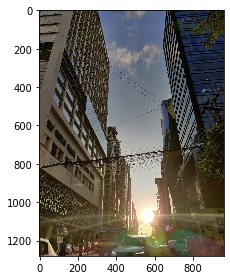

In [17]:
I = io.imread('/content/sample.jpg') # Replace None with appropriate function call line
io.imshow(I)

# find the height and the width of the image
H = None # should contain height
W = None # should contain width

### BEGIN SOLUTION
H = I.shape[0]
W = I.shape[1]
print("Height is", H)
print("Width is", W)
### END SOLUTION

In [18]:
# Normalize the image so that the gray scales are between 0 and 1. Save it to I and display the image
I =  img_as_float(I)

### BEGIN SOLUTION

### END SOLUTION

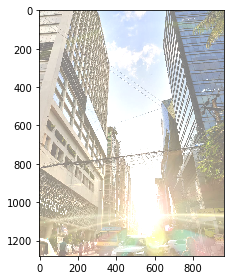

In [19]:
# Increase the brightness of the image without changing the contrast. 
# Save the resulting image in I_bright and display it.
I_bright = None 

### BEGIN SOLUTION
I_bright = np.clip(I +0.5, 0, 1)
io.imshow(I_bright) 
### END SOLUTION

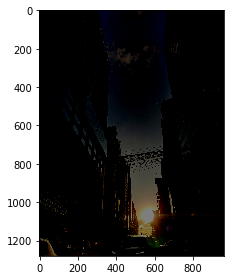

In [20]:
# Decrease the brightness of the image without changing the contrast. 
# Save the resulting image in I_dark and display it.
I_dark = None 

### BEGIN SOLUTION
I_dark = np.clip(I-0.5, 0, 1)
io.imshow(I_dark)
### END SOLUTION

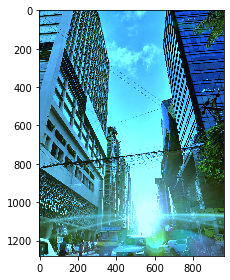

In [21]:
# Multiply the three channels of image I with three DIFFERENT numbers between 0.3 and 3 
# Save the resulting image in I_tint and display it.
# The resulting image should have some color shift
I_tint = None

# HINT: 
# I_tint = np.zeros(I.shape)
# I_tint[:, :, 0] =  ..... I[:, :, 0].....
# ......

### BEGIN SOLUTION
I_tint = np.zeros(I.shape)
I_tint[:,:, 0 ] = np.clip(I[:, :, 0]*0.8, 0, 1)
I_tint[:,:, 1 ] = np.clip(I[:, :, 1]*1.8, 0, 1)
I_tint[:,:, 2 ] = np.clip(I[:, :, 2]*2.8, 0, 1)
io.imshow(I_tint)
### END SOLUTION

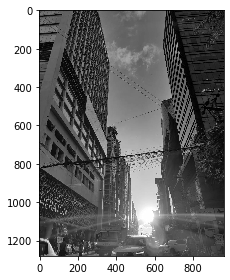

In [22]:
# Convert the image into a grayscale image.
# Save it to I_gray and display it
I_gray = None

### BEGIN SOLUTION
I_gray = color.rgb2gray(I)
io.imshow(I_gray)
### END SOLUTION

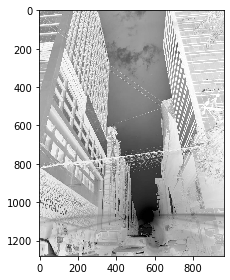

In [23]:
# Display the negative of the grayscale image

### BEGIN SOLUTION
I_negative = 1-I_gray
io.imshow(I_negative)
### END SOLUTION

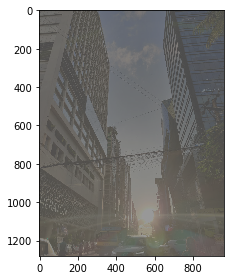

In [24]:
# Artificially degrade the **grayscale image** by reducing it contrast
# You can do so by recaling the gray values and concentrating them in a narrow range,
# say between 0.3 and 0.6.
# Save the image as I_degraded and display it
# HINT: SEE lec-4-demo-codes

I_degraded = None

### BEGIN SOLUTION
I_degraded = exposure.rescale_intensity(I, in_range=(0, 1), out_range=(0.3, 0.6))
io.imshow(I_degraded)
### END SOLUTION

In [25]:
# Complete the following function to perform Piecewise Linear Contrast stretching
# That is, implement the map shown in Slide 17 of Lecture 3

# Prototype: piecewise_contrast_stretch(I_gray, r1, r2, s1, s2)
# Assuming both input and output images are normalized between 0 and 1

def piecewise_contrast_stretch(I, r1, r2, s1, s2):
    ratio = (s1 - s2)/(r1-r2)
    # Write your code here
    I_stretched = (I - np.min(I))*ratio # replace with appropriate code
    return I_stretched
    ### BEGIN SOLUTION
    
    ### END SOLUTION



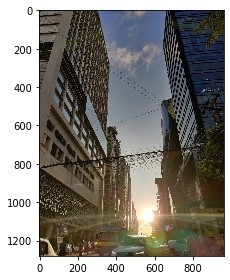

In [26]:
# To test your implementation, contrast strech the degraded image I_degrade
def minMaxScaler(I):
  r1 = I.min()*255
  r2 = I.max()*255
  s1 = 0
  s2 = 255
  return [r1, r2, s1, s2]

m = minMaxScaler(I_degraded)
I_stretched = piecewise_contrast_stretch(I_degraded, m[0], m[1], m[2], m[3])

# Display the strtched image

### BEGIN SOLUTION
io.imshow(I_stretched)
### END SOLUTION

# Task 2 - Histogram and Equalization

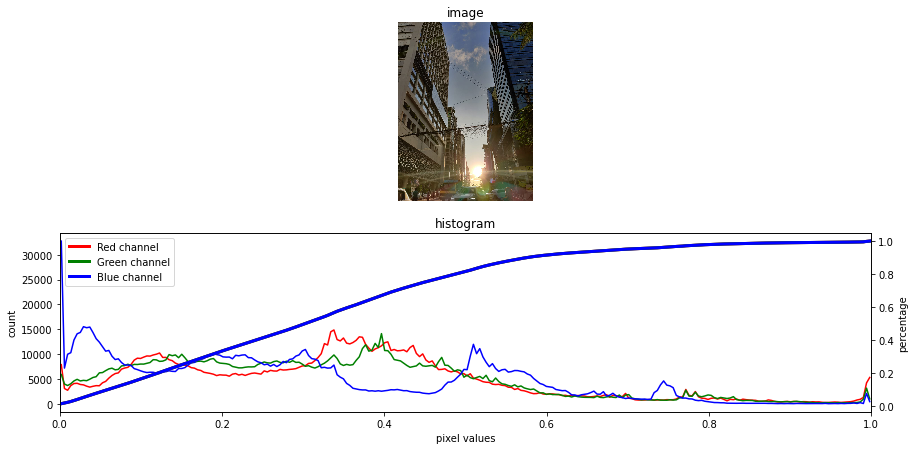

In [27]:
# Plot the Image and its histogram + cdf of the original image I
# Note that it is a color image, so it will have three different histograms

### BEGIN SOLUTION
# io.imshow(I)
# plt.axis('off')

def plot_hist_color(I, nbins=256, normalize=False, plot_cdf=True):
    color=['r', 'g', 'b']
    for i in range(3):
        hist, bins_hist = exposure.histogram(I[:, :, i].ravel(), nbins=nbins, normalize=normalize)
        plt.plot(bins_hist, hist, color[i])
        
    plt.xlabel("pixel values")
    if normalize:
        plt.ylabel("probability")
    else:
        plt.ylabel("count")
    
    if plot_cdf:
        cdf, bins_cdf = exposure.cumulative_distribution(I.ravel(), nbins=nbins)
        plt.twinx()
        plt.plot(bins_cdf, cdf, 'r', lw=3)
        plt.plot(bins_cdf, cdf, 'g', lw=3)
        plt.plot(bins_cdf, cdf, 'b', lw=3)
        plt.ylabel("percentage")
    xmax = 1 if I.max() <= 1 else 255
    plt.xlim([0, xmax])
    plt.legend(['Red channel', 'Green channel', 'Blue channel'])

def plot_img_and_hist(I, nbins=256, normalize=False, plot_cdf=True, figsize=(12, 6)):
    fig, ax = plt.subplots(2, 1, figsize=figsize)
    plt.subplot(2, 1, 1)
    io.imshow(I)
    plt.axis("off")
    plt.title("image")
    
    plt.subplot(2, 1, 2)
    plot_hist_color(I, nbins=nbins, normalize=normalize, plot_cdf=plot_cdf)
    plt.title("histogram")

plt.rcParams['figure.figsize'] = (6, 6)
plot_img_and_hist(I)
plt.show()
### END SOLUTION

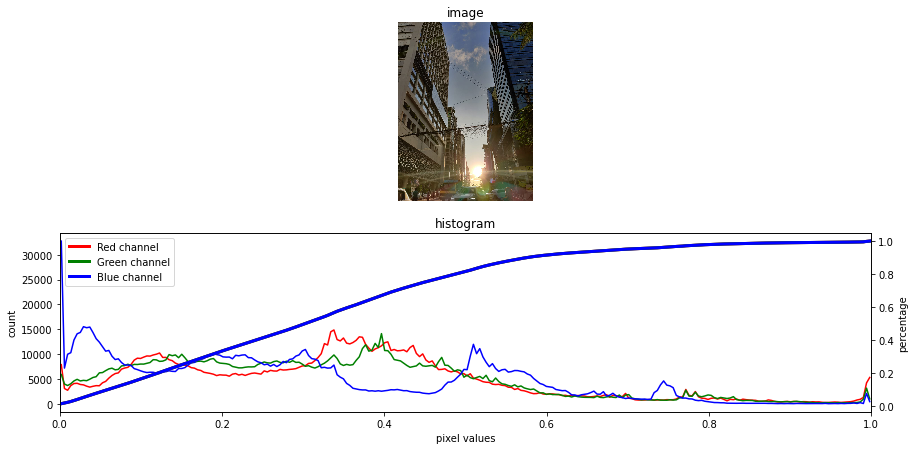

In [28]:
# Plot the Image and its histogram + cdf of the grayscale image I_gray

### BEGIN SOLUTION
Im = color.rgb2gray(I)

plt.rcParams['figure.figsize'] = (6, 6)
plot_img_and_hist(I)
plt.show()
### END SOLUTION

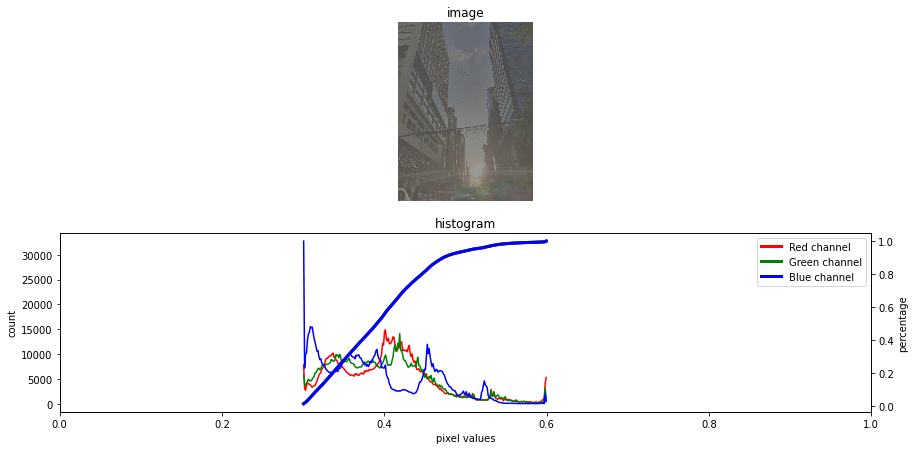

In [29]:
# Plot the Image and its histogram + cdf of the degraded image I_degraded

### BEGIN SOLUTION
plt.rcParams['figure.figsize'] = (6, 6)
plot_img_and_hist(I_degraded)
plt.show()
### END SOLUTION

/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


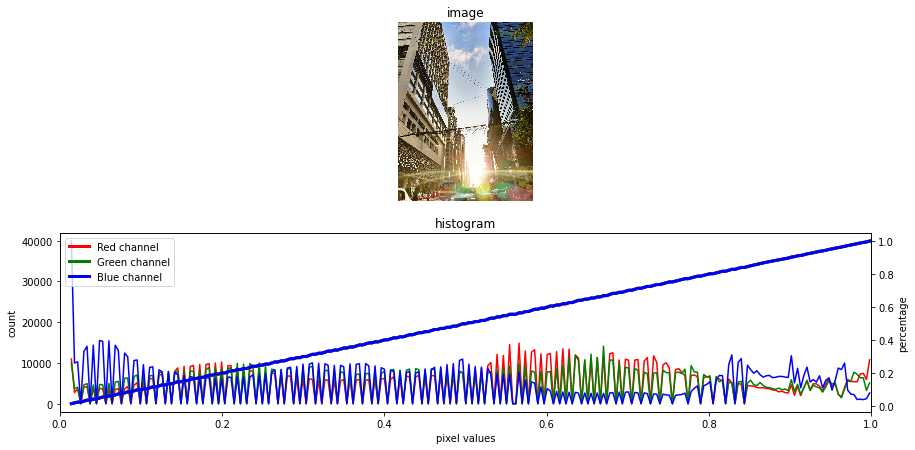

In [30]:
# Equalize the histogram of the degraded image I_degraded
# Save the result in I_recon_gray, display the image along with its histogram

I_recon_gray = exposure.equalize_hist(I_degraded)

### BEGIN SOLUTION
plot_img_and_hist(I_recon_gray)
### END SOLUTION

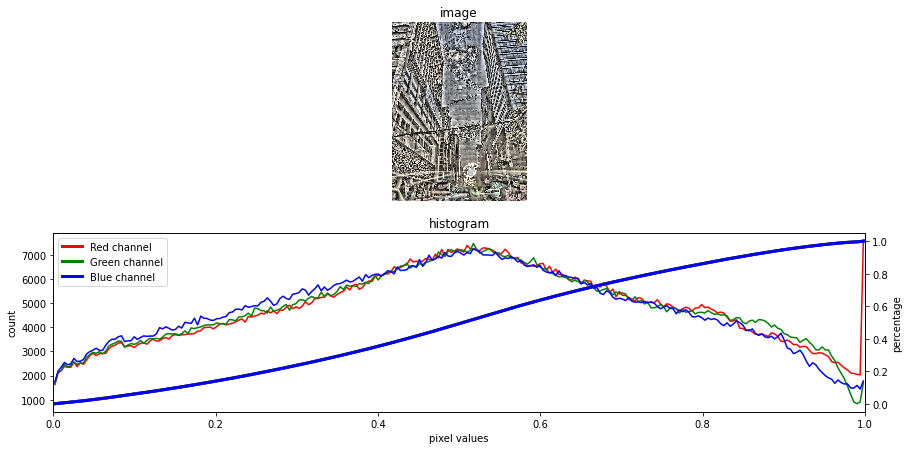

In [31]:
# Equalize the histogram of the degraded image I_degraded using AHE
# Save the result in I_recon_gray_2, display the image along with its histogram
### BEGIN SOLUTION
I_recon_gray_2 = exposure.equalize_adapthist(I_degraded,kernel_size = (36, 36), clip_limit = 0)
plot_img_and_hist(I_recon_gray_2)
### END SOLUTION

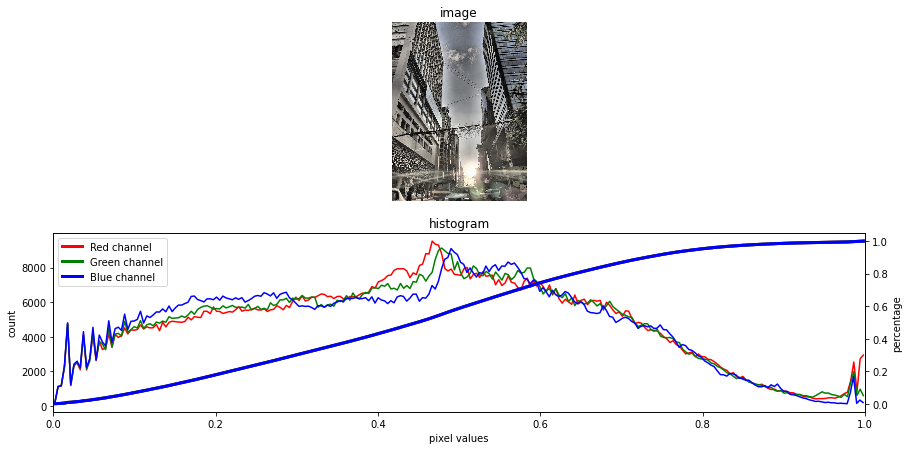

In [32]:
# Equalize the histogram of the degraded image I_degraded using CLAHE
# Save the result in I_recon_gray_2, display the image along with its histogram

I_recon_gray_3 = exposure.equalize_adapthist(I_degraded, kernel_size=(100, 100), clip_limit=0.01)

### BEGIN SOLUTION
plot_img_and_hist(I_recon_gray_3)
### END SOLUTION

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


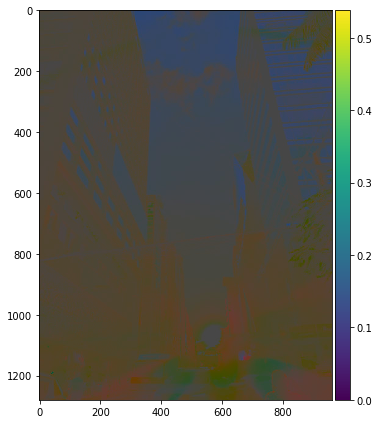

In [33]:
# Artificially degrade the original **RGB image** by reducing it contrast
# You can do so by recaling the values of the L channel (in LAB color space) 
# and concentrating them in a narrow range, say between 0.3 and 0.6.
# Save the image as I_rgb_degraded and display it
# HINT: SEE lec-4-demo-codes
I_sol = color.rgb2lab(I)
I_sol[:, :, 0] = I[:, :, 0]/98
I_rgb_degraded = exposure.rescale_intensity(I_sol[:,:,0], in_range=(0, 1), out_range=(0.3, 0.6))
I_sol[:,:,0] = I_rgb_degraded*100
image = color.lab2rgb(I_sol)
io.imshow(image)
### BEGIN SOLUTION

### END SOLUTION

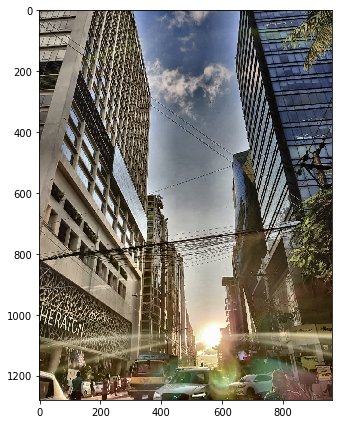

In [34]:
# Equalize the histogram of the degraded color image I_rgb_degraded using CLAHE
# Save the result in I_recon_color, display the image along with its histogram
# HINT: You have to convert to LAB first
# See the lecture and lecture-4-demo-codes

### BEGIN SOLUTION
I_sol = color.rgb2lab(I)
I_sol[:,:,0] = I_sol[:,:,0]/100

I_recon_color = exposure.equalize_adapthist(I_sol[:,:,0], kernel_size=(100, 100), clip_limit=0.01)

I_sol[:,:,0] = I_recon_color*100
image = color.lab2rgb(I_sol)
io.imshow(image)
### END SOLUTION

# Task 3 - Open Ended

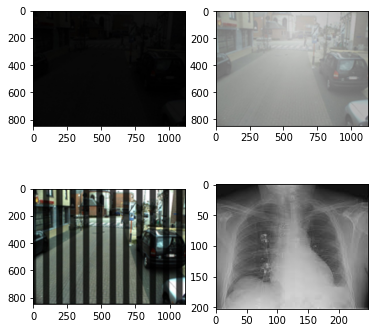

In [35]:
# There are four degraded images in this directory
# challenge-1.jpeg = very dark
# challenge-2.jpeg = washed out/foggy
# challenge-3.jpeg = alternative black bars
# challenge-4.jpeg = discoloured (the image is actually a color image) [BONUS]

# Your task is to improve these images using 
# contrast stretching, histogram equalization, AHE or CLAHE
# try different combination of parameter settings to see which produces the best result

### BEGIN SOLUTION
ch1 = io.imread('/content/drive/MyDrive/CSE428/Assignment 1/challenge-1 .jpg')
ch2 = io.imread('/content/drive/MyDrive/CSE428/Assignment 1/challenge-2.jpg')
ch3 = io.imread('/content/drive/MyDrive/CSE428/Assignment 1/challenge-3.jpg')
ch4 = io.imread('/content/download.jpg')

fig = plt.figure()
axis1 = fig.add_subplot(2,2,1)
axis1.imshow(ch1)
axis2 = fig.add_subplot(2,2,2)
axis2.imshow(ch2)
axis3 = fig.add_subplot(2,2,3)
axis3.imshow(ch3)
axis4 = fig.add_subplot(2,2,4)
axis4.imshow(ch4)



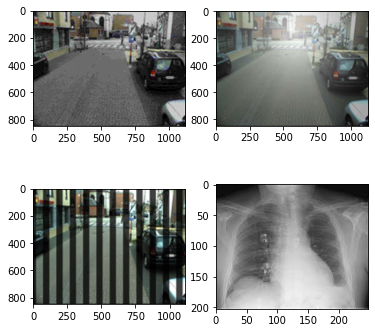

In [36]:
# Applysing Contrast Stretching on the images
p1 = minMaxScaler(ch1)
p2 = minMaxScaler(ch2)
p3 = minMaxScaler(ch3)
p4 = minMaxScaler(ch4)

fig = plt.figure()
axis1 = fig.add_subplot(2,2,1)
axis1.imshow(piecewise_contrast_stretch(ch1, p1[0], p1[1], p1[2], p1[3]))
axis2 = fig.add_subplot(2,2,2)
axis2.imshow(piecewise_contrast_stretch(ch2,p2[0], p2[1], p2[2], p2[3]))
axis3 = fig.add_subplot(2,2,3)
axis3.imshow(piecewise_contrast_stretch(ch3, p3[0], p3[1], p3[2], p3[3]))
axis4 = fig.add_subplot(2,2,4)
axis4.imshow(piecewise_contrast_stretch(ch4,p4[0], p4[1], p4[2], p4[3]))

/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


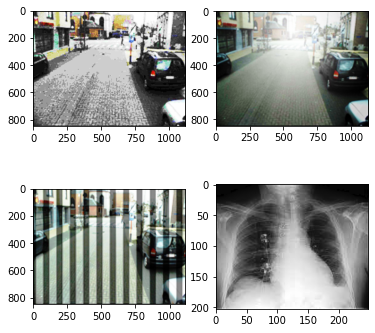

In [37]:
#Applying Histogram Equaliztion
fig = plt.figure()
axis1 = fig.add_subplot(2,2,1)
axis1.imshow(exposure.equalize_hist(ch1))
axis2 = fig.add_subplot(2,2,2)
axis2.imshow(exposure.equalize_hist(ch2))
axis3 = fig.add_subplot(2,2,3)
axis3.imshow(exposure.equalize_hist(ch3))
axis4 = fig.add_subplot(2,2,4)
axis4.imshow(exposure.equalize_hist(ch4))

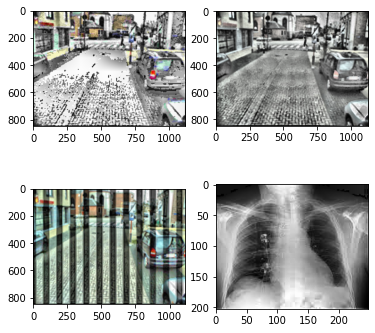

In [38]:
#Applying AHE on the images
fig = plt.figure()
axis1 = fig.add_subplot(2,2,1)
axis1.imshow(exposure.equalize_adapthist(ch1, kernel_size=(100, 100), clip_limit=0))
axis2 = fig.add_subplot(2,2,2)
axis2.imshow(exposure.equalize_adapthist(ch2, kernel_size=(100, 100), clip_limit=0))
axis3 = fig.add_subplot(2,2,3)
axis3.imshow(exposure.equalize_adapthist(ch3, kernel_size=(100, 100), clip_limit=0))
axis4 = fig.add_subplot(2,2,4)
axis4.imshow(exposure.equalize_adapthist(ch4, kernel_size=(100, 100), clip_limit=0))

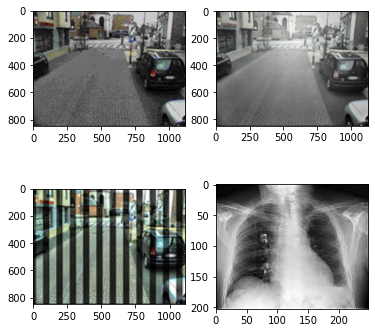

In [39]:
#Applying CLAHE on the images
fig = plt.figure()
axis1 = fig.add_subplot(2,2,1)
axis1.imshow(exposure.equalize_adapthist(ch1, kernel_size=(100, 100), clip_limit=0.01))
axis2 = fig.add_subplot(2,2,2)
axis2.imshow(exposure.equalize_adapthist(ch2, kernel_size=(100, 100), clip_limit=0.01))
axis3 = fig.add_subplot(2,2,3)
axis3.imshow(exposure.equalize_adapthist(ch3, kernel_size=(100, 100), clip_limit=0.01))
axis4 = fig.add_subplot(2,2,4)
axis4.imshow(exposure.equalize_adapthist(ch4, kernel_size=(100, 100), clip_limit=0.01))